# 진행상황

* 데이터의 크기 확인<br>
* 데이터의 수를 확인<br>
* 각 리뷰에 대한 문자 길이 <br>
* 많이 사용되는 단어 <br> 
* 타겟 : 긍/부정의 분포 <br>
* 각 리뷰에 사용되는 단어의 수 <br>
* 특수 문자, 대문자, 소문자 등에 대한 비율 -> 전처리;;;; <br>
ref) https://www.kaggle.com/c/word2vec-nlp-tutorial/data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

* 추가적으로 코드상으로 압축 관련된 파일을 처리하기 위한 부분

In [3]:
import os # 운영체제 관련
import zipfile # 압축 파일 처리 관련

In [4]:
# 압축을 풀려고 하는 파일이 있는 폴더 경로
DATA_IN_PATH = "07_data/data/"
# 압축을 풀고자 하는 파일 이름 리스트
file_list = ["labeledTrainData.tsv.zip","testData.tsv.zip","unlabeledTrainData.tsv.zip"]

for file in file_list:
    zip_ref = zipfile.ZipFile(DATA_IN_PATH +file, "r" ) # 풀 압축 파일 경로
    zip_ref.extractall(DATA_IN_PATH)  # 풀어서 어디에 둘지 폴더 경로
    zip_ref.close()

* 데이터 불러와서 확인

In [5]:
for file in os.listdir(DATA_IN_PATH):
    if "tsv" in file and "zip" not in file:
        print(file.ljust(30) + str(os.path.getsize(DATA_IN_PATH+file)))

labeledTrainData.tsv          33556378
testData.tsv                  32724746
unlabeledTrainData.tsv        67281491


* DF로 tsv-> csv 동일한데, 구분자를 tab 사용을 합니다..read_csv( del=>)

In [6]:
train_data = pd.read_csv(DATA_IN_PATH +"labeledTrainData.tsv", header =0, delimiter = "\t", quoting=3)
train_data.head()

id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...

* 데이터의  수

In [7]:
len(train_data)

25000

* 각 리뷰의 문자 길이에 대한 값을 찾아보세요~

In [8]:
train_data["review"][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

In [9]:
train_length = train_data["review"].apply(lambda x : len(x))
train_length  # 리뷰마다 글의 길이 차이가 좀 있다

0        2304
1         948
2        2451
3        2247
4        2233
         ... 
24995     582
24996     977
24997     643
24998    1143
24999     944
Name: review, Length: 25000, dtype: int64

* 각 리뷰별 단어 수에 대한 그래프

Text(0, 0.5, 'Number of review')

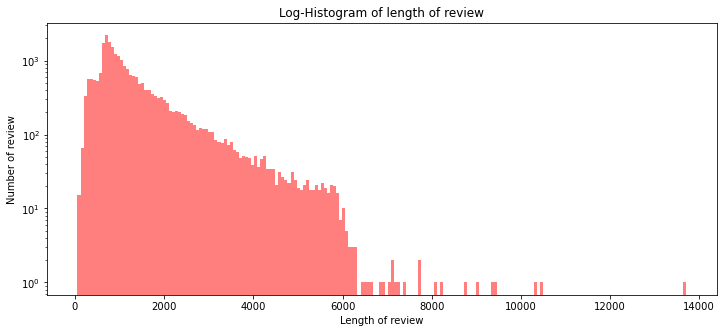

In [11]:
# 그래프에 대한 이미지 사이즈 선언
# figsize: (가로, 세로) 형태의 튜플로 입력
plt.figure(figsize=(12, 5))
# 히스토그램 선언
# bins: 히스토그램 값들에 대한 버켓 범위
# range: x축 값의 범위
# alpha: 그래프 색상 투명도
# color: 그래프 색상
# label: 그래프에 대한 라벨
plt.hist(train_length, bins=200, alpha=0.5, color= 'r', label='word')
plt.yscale('log', nonpositive='clip')
# 그래프 제목
plt.title('Log-Histogram of length of review')
# 그래프 x 축 라벨
plt.xlabel('Length of review')
# 그래프 y 축 라벨
plt.ylabel('Number of review')

-> 대부분의 리뷰가 거의 6000자 이하로 작성이 되고,,, 대다수가 리뷰를 1000~6000자 사이가 대부분인 것 같다

-> 글자수가 8000, 10000자 이상인 것들은,,,이상치;;;;

In [12]:
# 기본적인 용약 통계량들이 여기서도 적용이 가능
print("리뷰 최대 길이 값 :", np.max(train_length) )
print("리뷰 최소 길이 값 :", np.min(train_length) )
print("리뷰 평균 길이 값 :", np.mean(train_length) )
print("리뷰 표준편차 길이 값 :", np.std(train_length) )
print("리뷰 중앙값 길이 값 :", np.median(train_length) )
print("리뷰 사분위 25 길이 값 :", np.percentile(train_length, 25) )
print("리뷰 사분위 75 길이 값 :", np.percentile(train_length, 75) )

리뷰 최대 길이 값 : 13710
리뷰 최소 길이 값 : 54
리뷰 평균 길이 값 : 1329.71056
리뷰 표준편차 길이 값 : 1005.2191407969154
리뷰 중앙값 길이 값 : 983.0
리뷰 사분위 25 길이 값 : 705.0
리뷰 사분위 75 길이 값 : 1619.0


<AxesSubplot:>

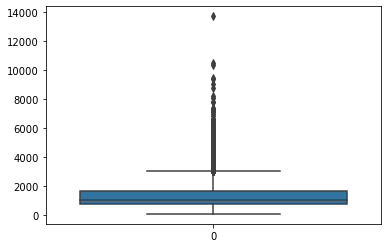

In [13]:
sns.boxplot(data=train_length)

* 가장 많이 사용되는 단어는?

In [ ]:
!conda install -c conda-forge wordcloud

In [14]:
from wordcloud import WordCloud

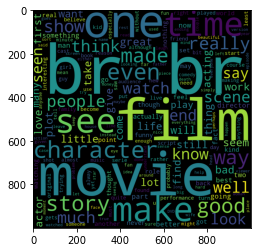

In [15]:
# wordcloud -> 기준 : 단어(간단하게 대략적으로 띄어쓰기로만 단어라고 간주)
# 한글 할 때에는 꾸미기에 글꼴을 한글 지원 글꼴로 설정
# 특정한 이미지에 워드클라우드
cloud = WordCloud(width = 1000, height = 1000 #기타 등등 꾸미기 옵션
                 ).generate(" ".join(train_data["review"]))
plt.imshow(cloud)

-> br html상의 tag들이 텍스트 데이터 안에 많이 들어있겠구나ㅓ;;;; -> 지워야 겠다;;;

* target : 긍정/부정

<AxesSubplot:xlabel='sentiment', ylabel='count'>

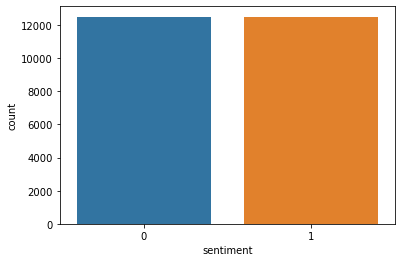

In [16]:
sns.countplot(data=train_data, x="sentiment")

In [17]:
train_data["sentiment"].value_counts(normalize = True)

1    0.5
0    0.5
Name: sentiment, dtype: float64

* 리뷰에 대한 단어수에 대한 것을 분포...

In [18]:
# 전에는 그냥 알파벳 숫자가 어떻게 되는지 봤고
# 목적은 단어를 기준으로 몇 단어가 주로 리뷰에 사용되는지 체크
# 간단히 : 공란을 기준으로 몇 개의 덩어리가 있는지 보겠다
train_word_counts = train_data["review"].apply(lambda x : len(x.split(" ")))
train_word_counts

0        433
1        158
2        378
3        379
4        367
        ... 
24995     95
24996    174
24997    127
24998    197
24999    184
Name: review, Length: 25000, dtype: int64

Text(0, 0.5, 'Number of reviews')

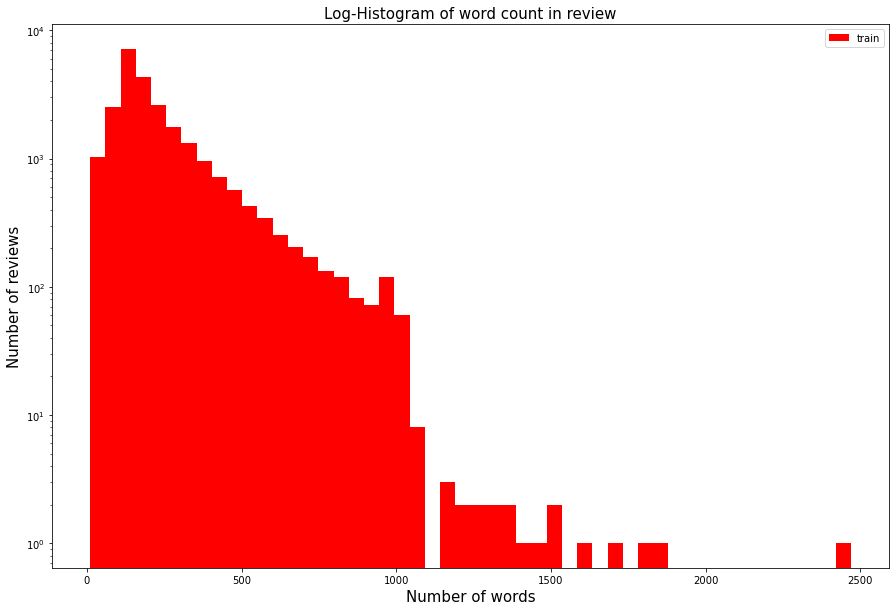

In [19]:
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=50, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonpositive='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

-> 단어(띄어쓰기 기준으로 한 단어로 봤을 때)를 기준으로 볼 때 1000단어로 구성이 되어 있는 듯...200전후가 가장 많은 단어인듯..

In [20]:
print("리뷰 최대 길이 값 :", np.max(train_word_counts) )
print("리뷰 최소 길이 값 :", np.min(train_word_counts) )
print("리뷰 평균 길이 값 :", np.mean(train_word_counts) )
print("리뷰 표준편차 길이 값 :", np.std(train_word_counts) )
print("리뷰 중앙값 길이 값 :", np.median(train_word_counts) )
print("리뷰 사분위 25 길이 값 :", np.percentile(train_word_counts, 25) )
print("리뷰 사분위 75 길이 값 :", np.percentile(train_word_counts, 75) )

리뷰 최대 길이 값 : 2470
리뷰 최소 길이 값 : 10
리뷰 평균 길이 값 : 233.78624
리뷰 표준편차 길이 값 : 173.74237015380743
리뷰 중앙값 길이 값 : 174.0
리뷰 사분위 25 길이 값 : 127.0
리뷰 사분위 75 길이 값 : 284.0


* 특수문자, 대소문자 비율

In [21]:
# 25000개의 리뷰를 받았는데, 이 리뷰에서 ?가 있는 리뷰는 몇 %일까요?
qmarks = np.mean(train_data["review"].apply(lambda x : "?" in x))
qmarks

0.29552

In [22]:
# 25000개의 리뷰를 받았는데, .표가 있는 리뷰는 몇 %?
fullstop = np.mean(train_data["review"].apply(lambda x : "." in x))
fullstop

0.99688

In [23]:
train_data["review"][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

-> 특수문자가 있어서 뭔가 특수문자에 대한 처리 고민;;;;지울지..의미를 부여할지..<br>
-> 대소문자가 섞여 있어서.....뭔가 통일을 해야겠다...

* 데이터 전처리

In [24]:
import re
import json # -> dict 처럼 key-value로 쉽게 처리...

import pandas as pd
import numpy as np

# html 상의 tag --> BeautifulSoup -> 전처리 용으로 사용
from bs4 import BeautifulSoup

# 불필요한 단어들을 제거하는 stopwords -> nltk
from nltk.corpus import stopwords

# 문장을 단어와 하고 잘라주는데.. tf -> 수치화 하는데 사용
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer


In [25]:
# 데이터 다시 불러옴 -> 전처리를 할 계획을 세웠으니 이제 전처리를 하기 위해서..
train_data = pd.read_csv("07_data/data/labeledTrainData.tsv", header=0, delimiter="\t",quoting=3 )
train_data.head()

id  sentiment                                             review
0  "5814_8"          1  "With all this stuff going down at the moment ...
1  "2381_9"          1  "\"The Classic War of the Worlds\" by Timothy ...
2  "7759_3"          0  "The film starts with a manager (Nicholas Bell...
3  "3630_4"          0  "It must be assumed that those who praised thi...
4  "9495_8"          1  "Superbly trashy and wondrously unpretentious ...

In [26]:
train_data["review"][0]

'"With all this stuff going down at the moment with MJ i\'ve started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ\'s feeling towards the press and also the obvious message of drugs are bad m\'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally

* tag 값을 지워보자...

In [27]:
# 정규식을 사용해서 지울 수도 있고
# 여기서는 BeautifulSoup 사용해서 지우는 것으로 해보기
temp = train_data["review"][0]
temp_text = BeautifulSoup(temp, "html5lib").get_text() # -> html 상의 태그 날리기
# 그 다음으로 알파벳만 남기겠다 -> 정규식
temp_text = re.sub("[^a-zA-Z]"," ", temp_text)
temp_text

' With all this stuff going down at the moment with MJ i ve started listening to his music  watching the odd documentary here and there  watched The Wiz and watched Moonwalker again  Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent  Moonwalker is part biography  part feature film which i remember going to see at the cinema when it was originally released  Some of it has subtle messages about MJ s feeling towards the press and also the obvious message of drugs are bad m kay Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring  Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him The actual feature film bit when it finally starts is only on for    m

* 샘플로 stop_words 처리

In [28]:
# 만약에 stopwords에 대해서 해당 자료가 머신에 없으면 수행해서 다운로드
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MEDICI\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [29]:
# 패키지에 있던 불용어 사전에 대한 리스트업
stop_words = set(stopwords.words("english"))
# 문자들을 대소문자를 소문자로 통일
temp_text = temp_text.lower()
# 그냥 단순히 공란을 기준으로 단어라고 한다면
words = temp_text.split() # 리스트 형식으로 리턴
# words가 stop_words에 없으면 모아두겠다 -> 리스트 컴프리핸션으로 구현
words = [ w for w in words if  w not in stop_words]
print(words)

['stuff', 'going', 'moment', 'mj', 'started', 'listening', 'music', 'watching', 'odd', 'documentary', 'watched', 'wiz', 'watched', 'moonwalker', 'maybe', 'want', 'get', 'certain', 'insight', 'guy', 'thought', 'really', 'cool', 'eighties', 'maybe', 'make', 'mind', 'whether', 'guilty', 'innocent', 'moonwalker', 'part', 'biography', 'part', 'feature', 'film', 'remember', 'going', 'see', 'cinema', 'originally', 'released', 'subtle', 'messages', 'mj', 'feeling', 'towards', 'press', 'also', 'obvious', 'message', 'drugs', 'bad', 'kay', 'visually', 'impressive', 'course', 'michael', 'jackson', 'unless', 'remotely', 'like', 'mj', 'anyway', 'going', 'hate', 'find', 'boring', 'may', 'call', 'mj', 'egotist', 'consenting', 'making', 'movie', 'mj', 'fans', 'would', 'say', 'made', 'fans', 'true', 'really', 'nice', 'actual', 'feature', 'film', 'bit', 'finally', 'starts', 'minutes', 'excluding', 'smooth', 'criminal', 'sequence', 'joe', 'pesci', 'convincing', 'psychopathic', 'powerful', 'drug', 'lord', 

In [30]:
clean_review = " ".join(words)
print(clean_review)

stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate working

In [31]:
# 전처리 함수를 만들기 -> stopwords에 대해서는 옵션으로
# 입력 : 리뷰 + 파라미터 ( stopwords 처리를 할지 말지에 대한 : 기본은 안함)
# 처리 : html 테그 제거, 특수문자 제거해서 알파벳만 남기고, 소문자화 ++ stopwords
# 출력 : 단어리스틀로 리턴 X -> 문자열로 출력
def preprocessing(review, remove_stopwords=False):
    # 1. html 태그 정리
    review_text = BeautifulSoup(review, "html5lib").get_text()
    # 2. 특수문자 날리기
    review_text = re.sub("[^a-zA-Z]", " ", review_text)
    # 3. 소문자화 & 분리
    words = review_text.lower().split()
    # 4. 옵션 stopwor
    if remove_stopwords:
        stop_words = set(stopwords.words("english"))
        words = [w for w in words if w not in stop_words]
        # 다시 이어서 붙여서 문자열로 나타내기
        clean_review = " ".join(words) # -> 붙용어 처리가 된 것들
    else:
        clean_review = " ".join(words) # -> 붙용어 처리가 안 한 것들
    return clean_review

In [32]:
# 데이터를 싹 처리하기
clean_train_reviews = []
for review in train_data["review"]:
    clean_train_reviews.append(preprocessing(review, remove_stopwords = True))
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

* 전처리 관련 함수 만들기...

In [33]:
clean_train_reviews[100]

'uk edition show rather less extravagant us version person concerned get new kitchen perhaps bedroom bathroom wonderfully grateful got us version show everything reality tv instead making improvements house occupants could afford entire house gets rebuilt know show trying show lousy welfare system exists us beg hard enough receive rather vulgar product placement takes place particularly sears also uncalled rsther turning one family deprived area potential millionaires would far better help community whole instead spending hundreds thousands dollars one home build something whole community perhaps place diy power tools borrowed returned along building materials everyone benefit want giving one person cause enormous resentment among rest local community still live run houses'

* DF에다가 처리를 해보자!!

In [34]:
# 이렇게 전처리된 결과를 DF로 담아서 핸들링 하고자 한다
clean_train_df = pd.DataFrame({"review":clean_train_reviews, "sentiment":train_data["sentiment"]})
clean_train_df.head()

review  sentiment
0  stuff going moment mj started listening music ...          1
1  classic war worlds timothy hines entertaining ...          1
2  film starts manager nicholas bell giving welco...          0
3  must assumed praised film greatest filmed oper...          0
4  superbly trashy wondrously unpretentious explo...          1

* 이제 기본적으로 필요한 단어들만 모아둔 리뷰를 했는데, 이제는 이 비정형 데이터 리뷰를 정형데이터로 변환을 해야함!!! -> 편하게 하고자 keras 있는 전처리 함수들을 가지고 사용을 할 것임!!!!

In [35]:
# 쪼개야 할 것임.
tokenizer = Tokenizer()
# -> 어떤 단어를 몇 번째로 할지 : 단어별 숫자 할당에 대한 룰
tokenizer.fit_on_texts(clean_train_reviews) 
# -> 단어별 할당된 숫자 규칙을 문자열에 적용해서 단어가 아니라 그 단어의 고유값들의 순서로 변환을 하는 것
text_sequences = tokenizer.texts_to_sequences(clean_train_reviews)

In [36]:
clean_train_reviews[0]

'stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate workin

In [37]:
print(text_sequences[0])

[404, 70, 419, 8815, 506, 2456, 115, 54, 873, 516, 178, 18686, 178, 11242, 165, 78, 14, 662, 2457, 117, 92, 10, 499, 4074, 165, 22, 210, 581, 2333, 1194, 11242, 71, 4826, 71, 635, 2, 253, 70, 11, 302, 1663, 486, 1144, 3265, 8815, 411, 793, 3342, 17, 441, 600, 1500, 15, 4424, 1851, 998, 146, 342, 1442, 743, 2424, 4, 8815, 418, 70, 637, 69, 237, 94, 541, 8815, 26055, 26056, 120, 1, 8815, 323, 8, 47, 20, 323, 167, 10, 207, 633, 635, 2, 116, 291, 382, 121, 15535, 3315, 1501, 574, 734, 10013, 923, 11578, 822, 1239, 1408, 360, 8815, 221, 15, 576, 8815, 22224, 2274, 13426, 734, 10013, 27, 28606, 340, 16, 41, 18687, 1500, 388, 11243, 165, 3962, 8815, 115, 627, 499, 79, 4, 8815, 1430, 380, 2163, 114, 1919, 2503, 574, 17, 60, 100, 4875, 5100, 260, 1268, 26057, 15, 574, 493, 744, 637, 631, 3, 394, 164, 446, 114, 615, 3266, 1160, 684, 48, 1175, 224, 1, 16, 4, 8815, 3, 507, 62, 25, 16, 640, 133, 231, 95, 7426, 600, 3439, 8815, 37248, 1864, 1, 128, 342, 1442, 247, 3, 865, 16, 42, 1487, 997, 2333, 12

In [38]:
print(text_sequences[1])

[232, 203, 3048, 3565, 7116, 317, 2, 405, 153, 19, 634, 10967, 11898, 8816, 1653, 1035, 3494, 232, 154, 314, 7116, 2701, 178, 2, 2349, 87, 1111, 582, 217, 2219, 149, 73, 160, 626, 1035, 2882, 194, 642, 3316, 3464, 3869, 154, 405, 180, 155, 158, 79, 1, 19718, 2177, 1251, 68, 6828, 170, 281, 811, 1, 532, 10968, 4, 2003, 16, 36, 881, 1251, 376, 634, 314, 7116, 159, 2564, 1653, 1035, 3494, 232, 511, 143, 317, 20, 623, 4628, 1251, 8974, 5471]


* 여기서 잠시;;;) 

In [39]:
tokenizer.word_index

{'movie': 1,
 'film': 2,
 'one': 3,
 'like': 4,
 'good': 5,
 'time': 6,
 'even': 7,
 'would': 8,
 'story': 9,
 'really': 10,
 'see': 11,
 'well': 12,
 'much': 13,
 'get': 14,
 'bad': 15,
 'people': 16,
 'also': 17,
 'first': 18,
 'great': 19,
 'made': 20,
 'way': 21,
 'make': 22,
 'could': 23,
 'movies': 24,
 'think': 25,
 'characters': 26,
 'character': 27,
 'watch': 28,
 'two': 29,
 'films': 30,
 'seen': 31,
 'many': 32,
 'life': 33,
 'plot': 34,
 'acting': 35,
 'never': 36,
 'love': 37,
 'little': 38,
 'best': 39,
 'show': 40,
 'know': 41,
 'ever': 42,
 'man': 43,
 'better': 44,
 'end': 45,
 'still': 46,
 'say': 47,
 'scene': 48,
 'scenes': 49,
 'go': 50,
 'something': 51,
 'back': 52,
 'real': 53,
 'watching': 54,
 'though': 55,
 'thing': 56,
 'old': 57,
 'years': 58,
 'actors': 59,
 'director': 60,
 'work': 61,
 'another': 62,
 'new': 63,
 'nothing': 64,
 'funny': 65,
 'actually': 66,
 'makes': 67,
 'look': 68,
 'find': 69,
 'going': 70,
 'part': 71,
 'lot': 72,
 'every': 73,
 'wo

In [40]:
word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0
print(len(word_vocab))

74066


* 리뷰에 대한 수치화에 대해서 각기 리뷰마다 차원이 다 제각각-> 특정 기준으로 표현을 해야 합니다!!
(여기서는 앞에서 EDA를 한 단어별 분포를 보고, 중앙값으로 선정을 하겠습니다.)

In [41]:
MAX_SEQUENCE_LENGTH = 174 # EDA에서 나온 중앙값으로 활용한 것
train_input = pad_sequences(text_sequences, maxlen = MAX_SEQUENCE_LENGTH, padding="post")
train_input.shape

(25000, 174)

* 정답지 추출

In [42]:
train_labels = np.array(train_data["sentiment"])
train_labels.shape

(25000,)

*  변환에 사용한 룰을 저장해두려고 함

In [43]:
# 사용자가 처리과정에서 했던 정보들을 기록하고 싶을 때
# 개인적으로 여기서는 2가지만 저장을 해둔 것임
# if 사용한 단어셋, 단어의 수 -> 2가지 정보를 기록해두겠다
data_config = {}
data_config["vocab"] = word_vocab
data_config["vocab_size"] = len(word_vocab)

* 전처리를 한 결과들 저장

In [44]:
# 처리한 것들을 저장할 폴더 경로
DATA_OUT_PATH = "07_data/data_out/"  # 폴더명쓰고 폴더구분자 (있으면 넣고 없으면 생성) 

# 처리한 데이터들을 저장할 파일들.. -> 처리한 결과들은 숫자로만 npy, pandas -> save
TRAIN_INPUT_DATA = "train_input.npy" # 앞에서 숫자로 바꾼 피처
TRAIN_LABEL_DATA = "train_label.npy" # 정답지에 대한 숫자..
TRAIN_CLEAN_DATA = "train_clean.csv" # 원본파일을 정제 처리한 결과
DATA_CONFIGS = "data__config.json" #  전처리 하는 과정에서 사용한 룰 + 기타 정보등

In [46]:
# 우리가 출력으로 내보낼 공간의 폴더가 실제 있거나 없거나...-> 없으면 만들도록..
# import os

if not os.path.exists(DATA_OUT_PATH):
    # 내가 저장하려고 한 폴더의 경로가 없다면 만들어주세요
    os.makedirs(DATA_OUT_PATH)

In [54]:
# 이제 구체적으로 전처리한 것들에 대한 데이터를 저장...-> 정제도 하고, 숫자로(174)
# np 타임에 대해서 save
np.save(open(DATA_OUT_PATH+TRAIN_INPUT_DATA,"wb"),train_input)
np.save(open(DATA_OUT_PATH+TRAIN_LABEL_DATA,"wb"),train_labels)

# 정제한 데이터의 글 -> 우리가 흔히 사용했던 DF (csv파일로 저장)
clean_train_df.to_csv(DATA_OUT_PATH+TRAIN_CLEAN_DATA, index = False)

# 정제하고 숫자로 표현하는 과정에서 사용한 룰!!!!
# dict -> json
# json파일로 dict저장
json.dump(data_config, open(DATA_OUT_PATH+DATA_CONFIGS, "w"), ensure_ascii = False)

* Test 에 대해서도 위의 기준대로 할 것.... ---ing

In [48]:
test_data = pd.read_csv(DATA_IN_PATH + "testData.tsv", header=0, delimiter="\t", quoting=3)
test_data.head()

id                                             review
0  "12311_10"  "Naturally in a film who's main themes are of ...
1    "8348_2"  "This movie is a disaster within a disaster fi...
2    "5828_4"  "All in all, this is a movie for kids. We saw ...
3    "7186_2"  "Afraid of the Dark left me with the impressio...
4   "12128_7"  "A very accurate depiction of small time mob l...

In [77]:
# train에서 했던 기본적인 전처리 과정 동일하게 수행~
clean_test_review = []
for review in test_data["review"]:
    clean_test_review.append(preprocessing(review, remove_stopwords=True) )

# DF로 만들어 두겠습니다.
clean_test_df = pd.DataFrame({"review": clean_test_review, 
                             "id": test_data["id"]})
# submission용
test_id = np.array(test_data["id"])

########### 그 다음에 전처리 이후에....워드에 대한 vocab --->  review -> vocab seq
#### ---> test  에서 fit_on_text 하면 안됨!!!!!!!
text_sequence = tokenizer.texts_to_sequences(clean_test_review) # --> 적용만
test_input = pad_sequences(text_sequence, maxlen=MAX_SEQUENCE_LENGTH,
                          padding="post")

* test 데이터 변형을 처리한 것을 출력하기

In [50]:
TEST_INPUT_DATA = "test_input.npy" # 전처리가 되고, 단어들이 숫자까지(최대 175개로) -> 기준은 train과 같은 기준으로!!!
TEST_CLEAN_DATA = "test_clean.csv" # 전처리를 한 실제 review 문장에 대한 것..
TEST_ID_DATA = "test_id.npy"

np.save(open(DATA_OUT_PATH +TEST_INPUT_DATA , "wb"), test_inputs)
np.save(open(DATA_OUT_PATH +TEST_ID_DATA , "wb"), test_id)
clean_test_df.to_csv(DATA_OUT_PATH + TEST_CLEAN_DATA, index=False)

* 이제서야...다 숫자로 변형이 되었으니....Model을 만들어서 돌릴 수 있음!! RF

In [61]:
# 기존의 머신러닝을 위한 필요한 모듈가 거의 동일.....
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


# 리뷰에 대한 수치 데이터를 feature화 -> 텍스트 데이터 처리에서 추가적으로...
from sklearn.feature_extraction.text import CountVectorizer

![CV](07_data/img2/02.png)

* 모델을 돌리기 위해서 저장한 폴더에서 다시 불러와서 한다면...

In [62]:
#  저장된 파일에서 불러와서 처리 하기
train_data = pd.read_csv(DATA_OUT_PATH + TRAIN_CLEAN_DATA)
train_data.head()

review  sentiment
0  stuff going moment mj started listening music ...          1
1  classic war worlds timothy hines entertaining ...          1
2  film starts manager nicholas bell giving welco...          0
3  must assumed praised film greatest filmed oper...          0
4  superbly trashy wondrously unpretentious explo...          1

In [71]:
# BoW처리하기 전에 -> 처리할 데이터들
reviews = list(train_data["review"])
y = np.array(train_data["sentiment"])

In [75]:
reviews

['stuff going moment mj started listening music watching odd documentary watched wiz watched moonwalker maybe want get certain insight guy thought really cool eighties maybe make mind whether guilty innocent moonwalker part biography part feature film remember going see cinema originally released subtle messages mj feeling towards press also obvious message drugs bad kay visually impressive course michael jackson unless remotely like mj anyway going hate find boring may call mj egotist consenting making movie mj fans would say made fans true really nice actual feature film bit finally starts minutes excluding smooth criminal sequence joe pesci convincing psychopathic powerful drug lord wants mj dead bad beyond mj overheard plans nah joe pesci character ranted wanted people know supplying drugs etc dunno maybe hates mj music lots cool things like mj turning car robot whole speed demon sequence also director must patience saint came filming kiddy bad sequence usually directors hate worki

* CountVectorize

In [54]:
# from sklearn.feature_extraction.text import CountVectorizer

In [72]:
vectorize = CountVectorizer(analyzer = "word", max_features=5000)
train_data_features = vectorize.fit_transform(reviews)
print(train_data_features.shape)

(25000, 5000)


* train -> train/ val

In [70]:
from sklearn.model_selection import train_test_split

In [76]:
# train -> train / test(val)
train_input, val_input, train_label, val_label = train_test_split(train_data_features,
                                                                  y,
                                                                 test_size=0.2,
                                                                 random_state=1234)

In [58]:
train_input.shape

(20000, 5000)

In [59]:
val_input.shape

(5000, 5000)

* RF

In [60]:
rf_model = RandomForestClassifier(n_estimators = 200, random_state = 1234, n_jobs= -1)
rf_model.fit(train_input, train_label)

RandomForestClassifier()

In [61]:
# eval -> accuracy로 평가!!
from sklearn.metrics import accuracy_score

In [62]:
y_pred = rf_model.predict(val_input)
accuracy_score(y_pred, val_input)

0.8426